
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [ ]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # Used for creating static, interactive, and animated visualizations
from matplotlib import pyplot as plt # Used for plotting and visualization, offers a MATLAB-like plotting framework
import pylab # Part of matplotlib, provides a convenient interface to plot and analyze data
import pingouin as pg # Used for statistical analysis in Python, offers a wide range of easy-to-use statistical functions and tests

df_mh = pd.read_csv('MillerHadenData.csv')



In [2]:
# Q1a (code):
# Display first few rows of the dataframe
import pandas as pd
df_mh = pd.read_csv('MillerHadenData.csv')
print(df_mh.head())

# Check data types and information
print(df_mh.info())


   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB
None


In [3]:
# Q1b (code):
# Check for missing values
print(df_mh.isnull().sum())


# Check whether there is a data point for each participant on both variables
print(df_mh.set_index('Participant').notnull().all(axis=1))



Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64
Participant
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
dtype: bool


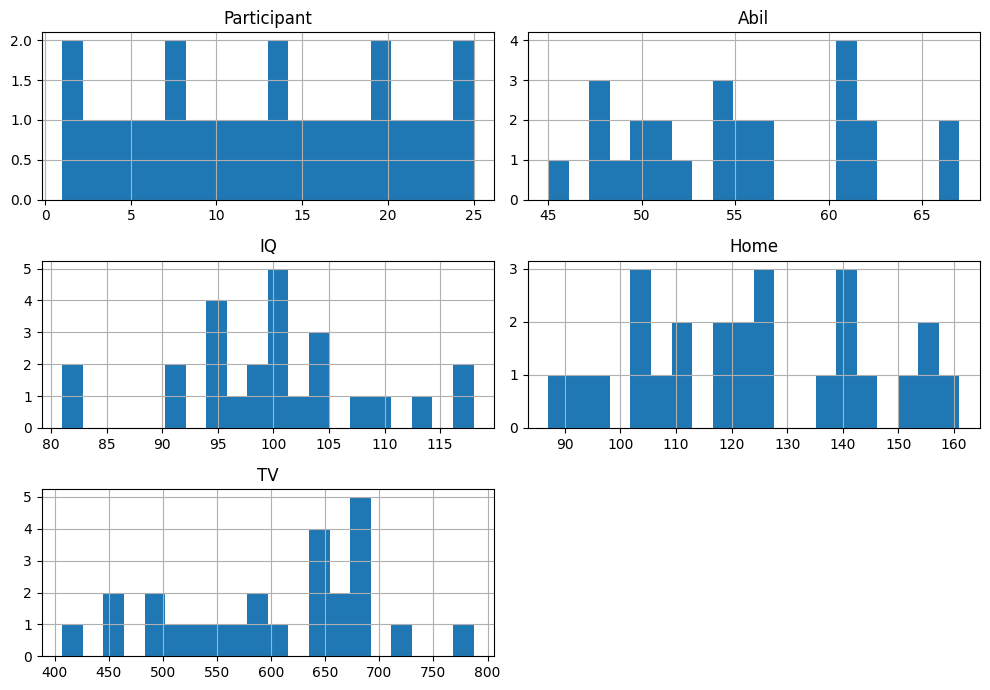

In [4]:
# Q1c (code):
# Check data distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for each numeric column
df_mh.hist(bins=20, figsize=(10, 7))
plt.tight_layout()
plt.show()



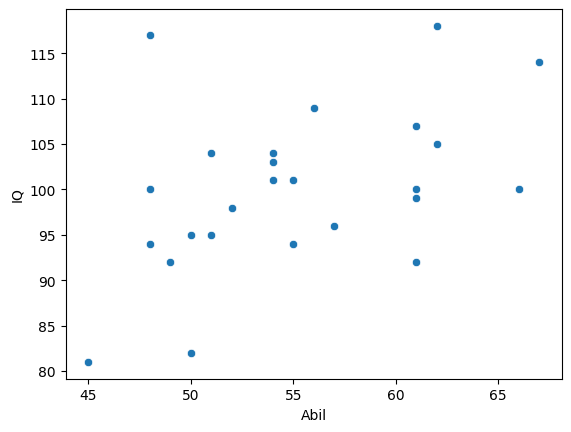

In [5]:
# Q1d (code):
# Scatter plot

# use scatterplot function to show the diagram
sns.scatterplot(data=df_mh, x='Abil', y='IQ')
plt.show()



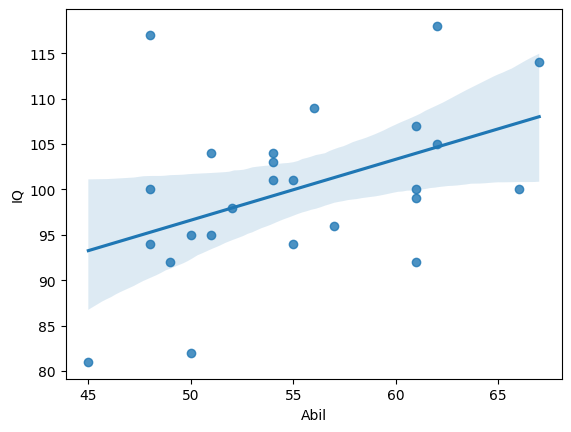

In [6]:
# Q1e (code):
# Correlation line
# use regplot function to show the diagram
sns.regplot(data=df_mh, x='Abil', y='IQ')
plt.show()


**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [12]:
# Q2a (answer with words):
print('The choice between Pearson and Spearman correlation coefficient tests depends on the distribution of the variables. Pearsons correlation requires that each dataset be normally distributed. Spearmans correlation does not assume that the data is from a bivariate normal distribution and is the appropriate choice when the variables are ordinal or not normally distributed. ')
print('Since we dont have information about the distribution of the data from Question 1, I will provide a general explanation. If the data distribution is normal, Pearsons correlation would be the appropriate test. If the data is not normally distributed or is ordinal, then Spearmans correlation is more appropriate.')

The choice between Pearson and Spearman correlation coefficient tests depends on the distribution of the variables. Pearsons correlation requires that each dataset be normally distributed. Spearmans correlation does not assume that the data is from a bivariate normal distribution and is the appropriate choice when the variables are ordinal or not normally distributed. 
Since we dont have information about the distribution of the data from Question 1, I will provide a general explanation. If the data distribution is normal, Pearsons correlation would be the appropriate test. If the data is not normally distributed or is ordinal, then Spearmans correlation is more appropriate.


In [13]:
# Calculate the Pearson correlation coefficient between 'Abil' and 'IQ'.
# This method measures the linear relationship between two variables.
# It assumes that the variables are normally distributed and the relationship is linear.
pearson_corr = df_mh['Abil'].corr(df_mh['IQ'], method='pearson')
print("Pearson Correlation Coefficient:", pearson_corr)

# Calculate the Spearman correlation coefficient between 'Abil' and 'IQ'.
# This method measures the monotonic relationship between two variables.
# It's a non-parametric test and doesn't assume a normal distribution of the variables.
# It's used when the variables are ordinal or not normally distributed.
spearman_corr = df_mh['Abil'].corr(df_mh['IQ'], method='spearman')
print("Spearman Correlation Coefficient:", spearman_corr)


Pearson Correlation Coefficient: 0.4511699387650761
Spearman Correlation Coefficient: 0.44147943839758197


In [1]:
# Q2c (answer with words):
print('The Pearson correlation coefficient between \'Abil\' and \'IQ\' is approximately 0.451, indicating a moderate positive linear relationship.')
print('The Spearman correlation coefficient is approximately 0.441, which is similar to the Pearson coefficient and also suggests a moderate positive monotonic relationship.')

The Pearson correlation coefficient between 'Abil' and 'IQ' is approximately 0.451, indicating a moderate positive linear relationship.
The Spearman correlation coefficient is approximately 0.441, which is similar to the Pearson coefficient and also suggests a moderate positive monotonic relationship.


## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [14]:
# Q3a (answer in words):
# H0:
print('There is no significant difference in the time spent reading at home per week between the two groups of reading ability.')
# H1：
print('There is a significant difference in the time spent reading at home per week between the two groups of reading ability.')

There is no significant difference in the time spent reading at home per week between the two groups of reading ability.
There is a significant difference in the time spent reading at home per week between the two groups of reading ability.


In [16]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ## Used for data manipulation and analysis, particularly for structured data operations, data cleaning, and preparation.
from scipy.stats import chi2_contingency ## Used for performing the Chi-square test of independence, to analyze the relationship between two categorical variables.


# Define the rounded average for Reading Ability and Home
abil_avg = df_mh['Abil'].mean()  # Calculate the average of the 'Abil' column
home_avg = df_mh['Home'].mean()  # Calculate the average of the 'Home' column

# Create the Rank_Abil column
df_mh['Rank_Abil'] = df_mh['Abil'].apply(lambda x: 'High' if x > abil_avg else 'Low')
# This lambda function categorizes 'Abil' into 'High' or 'Low' based on the average

# Create the Rank_Home column
df_mh['Rank_Home'] = df_mh['Home'].apply(lambda x: 'Above Average' if x > home_avg else 'Below Average')
# This lambda function categorizes 'Home' into 'Above Average' or 'Below Average' based on the average

In [17]:
# Q3c (code):
# Construct Contingency Matrix
contingency_table = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])
contingency_table


Rank_Home,Above Average,Below Average
Rank_Abil,,
High,8,2
Low,3,12


In [18]:
# Q3d (code):
# Perform the Chi-square test
from scipy.stats import chi2_contingency

# Performing the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2, p


(6.500270562770561, 0.010785807794066234)

In [ ]:
# Q3e (answer in words):
# answer: The Chi-square test gives us the following results:

# Chi-square statistic: 6.5003
# p-value: 0.01079
# Degrees of freedom: 1
# Expected frequencies: [[4.4, 5.6], [6.6, 8.4]]

# Since the p-value (0.01079) is less than 0.05, we reject the null hypothesis.
# This indicates that there is a statistically significant difference in the time spent reading at home per week between the two groups of reading ability.
# Those with higher reading abilities tend to differ in the amount of time they spend reading at home when compared to those with lower reading abilities.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [20]:

import pandas as pd # Used for data manipulation and analysis, particularly with structured data files like CSVs and Excel spreadsheets.
from scipy import stats # Provides a wide range of statistical functions, including probability distributions, correlation functions, and statistical tests.
import numpy as np # Used for numerical computing, providing support for arrays, matrices, and high-level mathematical functions.
import matplotlib.pyplot as plt # Used for creating static, interactive, and animated visualizations in Python.
import seaborn as sns # Based on matplotlib, provides a high-level interface for drawing attractive and informative statistical graphics.

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [21]:
# Q4a (code):
# Calculate mean and standard deviation for age
# Part a - Calculate mean and standard deviation for age
mean_age = df_evaluators['age'].mean()
std_dev_age = df_evaluators['age'].std()

print(f"The mean age of the evaluators is: {mean_age}")
print(f"The standard deviation of the age of the evaluators is: {std_dev_age}")



The mean age of the evaluators is: 30.852941176470587
The standard deviation of the age of the evaluators is: 6.238358141327351


In [22]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
# Part b - Count male and female evaluators
male_count = df_evaluators['sex'].value_counts()[1]
female_count = df_evaluators['sex'].value_counts()[2]

print(f"Number of male participants: {male_count}")
print(f"Number of female participants: {female_count}")


Number of male participants: 4
Number of female participants: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [24]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [25]:
# Q5 (code):

# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
filtered_df = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = filtered_df.groupby('eval_id').mean().reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
impression_hire_df = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
other_ratings = df_ratings[~df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent', 'impression', 'hire'])]
ratings2 = pd.concat([intellect_mean, impression_hire_df, other_ratings]).reset_index(drop=True)

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2_with_condition = ratings2.merge(df_evaluators, on='eval_id')

# Select only the necessary columns as per the structure required
# Assuming 'eval_id', 'Category', 'Rating', 'condition' are the columns we want to keep
final_ratings2 = ratings2_with_condition[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
final_ratings2_sorted = final_ratings2.sort_values(by=['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
final_ratings2_head = final_ratings2_sorted.head()
final_ratings2_head


<ipython-input-25-c5dc82bf4dc9>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  intellect_mean = filtered_df.groupby('eval_id').mean().reset_index()


,eval_id,Category,Rating,condition
2,1,hire,6.000000,listened
1,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
5,2,hire,4.000000,listened
4,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [ ]:
# Q6a (answer in words):
# Null hypothesis:
# There is no significant difference in the overall ratings on the [insert trait] scale between evaluators who listened to resume pitches and evaluators who read the resumes.
# Alternative hypothesis:
# There is a significant difference in the overall ratings on the [insert trait] scale between evaluators who listened to resume pitches and evaluators who read the resumes.
# we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

In [ ]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
# The choice between a one-tail or two-tail t-test depends on the specific objectives of the research.
# If we are interested only in whether the ratings by evaluators are significantly higher or lower under one condition (e.g., listening to resume pitches) than under another (e.g., reading resumes),
# we would use a one-tail test. If we are interested in any direction of difference, we would use a two-tail test.
# Without specific research context, a two-tail test is usually chosen as it does not assume a direction of difference.

In [ ]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
# Independent Variable (IV): The condition under which the evaluators are operating (listened vs. read).
# Dependent Variable (DV): The ratings given by the evaluators on the particular trait (which could be intellect, hireability, or impression).



To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [28]:
# Since the 'evaluators.csv' contains the 'condition' column,
# we'll merge it with the 'ratings.csv' DataFrame on 'eval_id' to get the 'condition' data aligned with the ratings.
df_ratings_with_condition = df_ratings.merge(df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')

# Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for statistical tests

# Descriptive analysis of the ratings
ratings_desc = df_ratings_with_condition['Rating'].describe()

# Test for normal distribution (Shapiro-Wilk test)
shapiro_results = shapiro(df_ratings_with_condition['Rating'])

# Test for homogeneity of variances (Levene's test)
ratings_listened = df_ratings_with_condition[df_ratings_with_condition['condition'] == 'listened']['Rating']
ratings_read = df_ratings_with_condition[df_ratings_with_condition['condition'] == 'read']['Rating']
levene_results = levene(ratings_listened, ratings_read)

# Independent t-tests
ttest_results = {}
for category in df_ratings_with_condition['Category'].unique():
    ratings_listened_category = df_ratings_with_condition[(df_ratings_with_condition['Category'] == category) & (df_ratings_with_condition['condition'] == 'listened')]['Rating']
    ratings_read_category = df_ratings_with_condition[(df_ratings_with_condition['Category'] == category) & (df_ratings_with_condition['condition'] == 'read')]['Rating']
    ttest_results[category] = ttest_ind(ratings_listened_category, ratings_read_category, nan_policy='omit')

# Assigning the results to a single variable as per the instructions
results = (ratings_desc, shapiro_results, levene_results, ttest_results)
results


(count    195.000000
 mean       4.623932
 std        2.232453
 min        0.000000
 25%        3.000000
 50%        5.000000
 75%        6.000000
 max        9.000000
 Name: Rating, dtype: float64,
 ShapiroResult(statistic=0.9712592959403992, pvalue=0.0004928783164359629),
 LeveneResult(statistic=3.122464195602149, pvalue=0.07880039958464048),
 {'competent': TtestResult(statistic=2.826113265725147, pvalue=0.007553791518672871, df=37.0),
  'thoughtful': TtestResult(statistic=3.2734396602669045, pvalue=0.0023080566337459773, df=37.0),
  'intelligent': TtestResult(statistic=3.5053451512457947, pvalue=0.001212741485598915, df=37.0),
  'impression': TtestResult(statistic=2.850766179025179, pvalue=0.007091060616710596, df=37.0),
  'hire': TtestResult(statistic=2.620100218173143, pvalue=0.012674511839824125, df=37.0)})

In [ ]:
#Q7b (answer in words):
#To interpret the results:

#The descriptive statistics provide an overview of the data, including measures of central tendency and variability.
#The Shapiro-Wilk test assesses the normality of the data distribution, which is an assumption of the t-test.
#Levene’s test evaluates the equality of variances between the two groups, which is another assumption of the t-test.
#Independent t-tests are used to compare the means between two groups to determine if there is a statistically significant difference.
#The decisions on conducting these tests are based on meeting the assumptions necessary for an accurate t-test. If the assumptions are not met, it may lead to alternative methods or transformations of the data.